Nearest Neighbors Classification  
  : instance-based learning or non-generalizing learning

scikit-learn 2가지 Nearest Neighbors Classifiers   
  : KNeighborsClassifier, RadiusNeighborsClassifier
  
not uniformly sampled radiusneighborsclassifier can be a better choice.

* Parameter 
  1. weight 
     : uniform - assigns uniform weights to each neighbor  
     $\qquad \  $  distance - assigns weights proportional to the inverse of the distance from the query point.
  2. n_neighbors


* Algorithms
  1. Brute Force (naive implementation / small data samples 적합)  
     : brute-force(무자별대입) computation of distances between all pairs of points in the dataset  

  2. K-D Tree  
     : brute-force approach의 계산적 비효율성를 고려  
       tree-based data structures로 거리계산을 위한 횟수를 줄임.  
       A와 B가 멀고, B와 C가 가깝다면, A와 C는 멀다
  3. Ball Tree  
     : 높은 차원에서의 KD Tree의 비효율성을 제고하기 위해  
       triangle inequality를 활용해서 계산 
       $$|x+y| \leq |x| + |y|$$

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [6]:
# Train / Test set 나누기
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [7]:
# Check
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights' : ['uniform', 'diatance'], 'n_neighbors' : [3,4,5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

## 2. Data Augmentation

In [11]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape([-1])

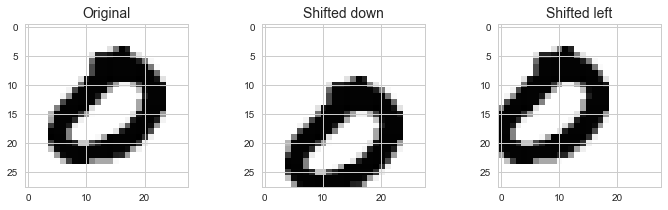

In [12]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [13]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [14]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [15]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [17]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763